My attempt at implementing simple logistic regression using different gradient descent techniques. Please note that algorithm is general but the plots are limited to 2 features.


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  z = 1/(1+np.exp(-x))
  return z

In [ ]:
def predict(X, W):

  predictions = sigmoid(X.dot(W))

  predictions[predictions >= 0.5] = 1
  predictions[predictions < 0.5] = 0

  return predictions

In [ ]:
(X, Y) = make_blobs(n_samples = 1000, n_features= 2, centers=2, cluster_std=1.5, random_state = 1)
Y = Y.reshape((Y.shape[0],1))
X = np.c_[X, np.ones((X.shape[0]))]


Logistic regression using batch (vanilla) gradient descent

In [ ]:
def logistic_reg_batch_gradient_descent(X, Y, learning_rate = 0.01, epoch = 100):

  train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.5, random_state =42)
  W = np.random.randn(X.shape[1],1)

  Cost_list = []

  for i in np.arange(0,epoch):

    preds = sigmoid(train_X.dot(W))
    loss = np.sum(np.square(preds - train_Y))
    Cost_list.append(loss)

    gradients = train_X.T.dot(preds - train_Y)
    W += - learning_rate * gradients

    if i == 0 or (i+1)%10==0:
      print("Epoch : "+str(int(i+1)), end = "   ")
      print("Loss : "+str(loss))
  
  print("Final training loss : "+str(Cost_list[-1])+"\n")
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0,epoch), Cost_list)
  plt.title("Loss vs Epoch on training data")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()

  print("\n")
  pred_test = predict(test_X, W)
  print("Evaluating on test data")
  print(classification_report(test_Y, pred_test))

  plt.style.use("ggplot")
  plt.figure()
  x_min, x_max = test_X[:, 0].min() - 1, test_X[:, 0].max() + 1
  y_min, y_max = test_X[:, 1].min() - 1, test_X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
  raveled_xx = xx.ravel().reshape(-1,1)
  raveled_yy = yy.ravel().reshape(-1,1)
  Z = predict(np.c_[np.c_[raveled_xx, raveled_yy], np.ones((raveled_xx.shape[0],1))], W).reshape(xx.shape)
  plt.contour(xx, yy, Z, alpha=0.2, linewidths = 1, linestyles = "dashed", colors = ['blue'])
  plt.scatter(test_X[:,0], test_X[:,1], marker=".", c=test_Y, s=35)
  plt.title("Test data plotted with decision boundary")

  return Cost_list, W

Epoch : 1   Loss : 2.8015446539190094
Epoch : 10   Loss : 0.4750734052459376
Epoch : 20   Loss : 0.34163201229732376
Epoch : 30   Loss : 0.2763866958273108
Epoch : 40   Loss : 0.23471075432726093
Epoch : 50   Loss : 0.20511907421428743
Epoch : 60   Loss : 0.18273098576267877
Epoch : 70   Loss : 0.16504969393958635
Epoch : 80   Loss : 0.15064513321633521
Epoch : 90   Loss : 0.1386308045324089
Epoch : 100   Loss : 0.12842374504284323
Final training loss : 0.12842374504284323



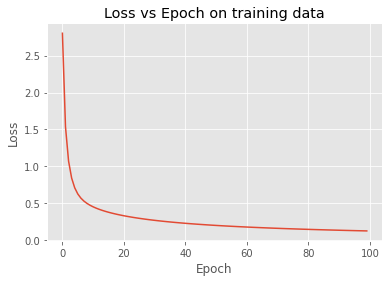



Evaluating on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



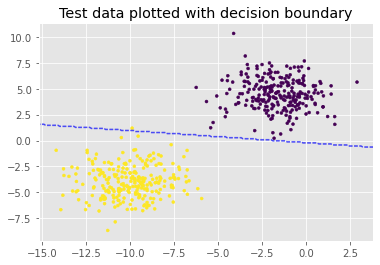

In [ ]:
Cost_list, W = logistic_reg_batch_gradient_descent(X, Y, learning_rate = 0.005, epoch = 100)

Logistic regression using Stochastic Gradient Descent (SGD) / Mini-batch Gradient Descent


In [ ]:
def get_next_batch(X, Y, batch_size):

  for i in np.arange(0, X.shape[0], batch_size):
    yield (X[i:i+batch_size], Y[i:i+batch_size])

In [ ]:
def logistic_reg_stochastic_gradient_descent(X, Y, batch_size=32, learning_rate=0.01, epoch=100):

  train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.5, random_state = 42)
  W = np.random.randn(X.shape[1],1)

  Cost_list = []

  for i in np.arange(0, epoch):

    Epoch_cost_list = []

    for x, y in get_next_batch(train_X, train_Y, batch_size):

      preds = sigmoid(x.dot(W))
      loss = np.sum(np.square(preds - y))
      Epoch_cost_list.append(loss)

      gradients = x.T.dot(preds - y)
      W += - learning_rate * gradients

    epoch_loss = np.average(Epoch_cost_list)
    Cost_list.append(epoch_loss)

    if i == 0 or (i+1)%10==0:
      print("Epoch : "+str(int(i+1)), end = "   ")
      print("Loss : "+str(epoch_loss))

  print("Final training loss : "+str(Cost_list[-1])+"\n")
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0,epoch), Cost_list)
  plt.title("Loss vs Epoch on training data")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()

  print("\n")
  pred_test = predict(test_X, W)
  print("Evaluating on test data")
  print(classification_report(test_Y, pred_test))

  plt.style.use("ggplot")
  plt.figure()
  x_min, x_max = test_X[:, 0].min() - 1, test_X[:, 0].max() + 1
  y_min, y_max = test_X[:, 1].min() - 1, test_X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
  raveled_xx = xx.ravel().reshape(-1,1)
  raveled_yy = yy.ravel().reshape(-1,1)
  Z = predict(np.c_[np.c_[raveled_xx, raveled_yy], np.ones((raveled_xx.shape[0],1))], W).reshape(xx.shape)
  plt.contour(xx, yy, Z, alpha=0.2, linewidths = 1, linestyles = "dashed", colors = ['blue'])
  plt.scatter(test_X[:,0], test_X[:,1], marker=".", c=test_Y, s=35)
  plt.title("Test data plotted with decision boundary")

  return Cost_list, W


Epoch : 1   Loss : 0.4376149743780137
Epoch : 10   Loss : 0.006758233261097132
Epoch : 20   Loss : 0.004114358776783524
Epoch : 30   Loss : 0.0030545182548736426
Epoch : 40   Loss : 0.0024568857922712805
Epoch : 50   Loss : 0.002065024821332877
Epoch : 60   Loss : 0.0017849346634050633
Epoch : 70   Loss : 0.0015731881558230336
Epoch : 80   Loss : 0.0014066710204398505
Epoch : 90   Loss : 0.0012718334561928162
Epoch : 100   Loss : 0.0011601533305390483
Final training loss : 0.0011601533305390483



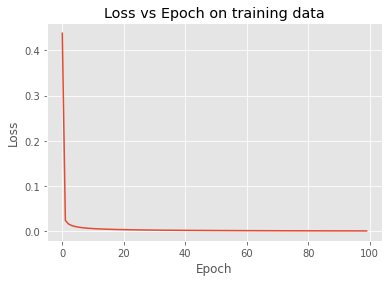



Evaluating on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



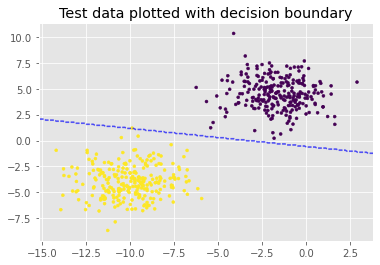

In [ ]:
Cost_list, W = logistic_reg_stochastic_gradient_descent(X, Y, batch_size=16, learning_rate=0.01, epoch=100)